In [26]:
import database as db
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
db.set_up_connection(db.db, 'db_weather', user='webscrapers')

postgres user password: ········


In [4]:
db.Station.select().first()

Station[1]

In [47]:
query = db.DailyMeasurement.select(lambda m : 'Berlin' in m.station.stationsname and dt.date(2017,4,26) < m.mess_datum and m.mess_datum < dt.date(2017,4,30)).get_sql()

In [48]:
pd_query = pd.read_sql(query, db.conn_url)
print(pd_query)

    mess_datum  stations_id  station  qn_3    fx   fm  qn_4  rsk  rskf  \
0   2017-04-27          400      400   NaN   NaN  NaN     3  0.0   0.0   
1   2017-04-28          400      400   NaN   NaN  NaN     3  0.4   4.0   
2   2017-04-29          400      400   NaN   NaN  NaN     3  0.6   4.0   
3   2017-04-27          403      403   NaN   NaN  NaN     3  0.0   0.0   
4   2017-04-28          403      403   NaN   NaN  NaN     3  0.3   6.0   
5   2017-04-29          403      403   NaN   NaN  NaN     3  0.0   8.0   
6   2017-04-27          410      410   NaN   NaN  NaN     3  0.0   0.0   
7   2017-04-28          410      410   NaN   NaN  NaN     3  0.0   4.0   
8   2017-04-29          410      410   NaN   NaN  NaN     3  0.0   0.0   
9   2017-04-27          420      420   NaN   NaN  NaN     3  0.0   0.0   
10  2017-04-28          420      420   NaN   NaN  NaN     3  0.3   4.0   
11  2017-04-29          420      420   NaN   NaN  NaN     3  0.2   4.0   
12  2017-04-27          427      427  

In [51]:
temperature = pd_query['tmk']
print(temperature.shape)

(21,)


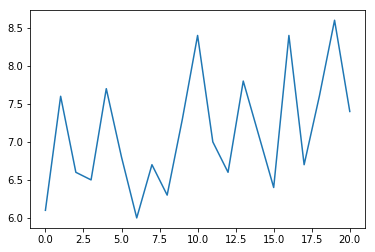

In [52]:
plt.plot(range(temperature.shape[0]), temperature)
plt.show()

In [50]:
query2 = db.Station.select(lambda s: 'Berlin' in s.stationsname)
pd.read_sql_query(query2.get_sql(), db.conn_url)

,stations_id,von_datum,bis_datum,stationshoehe,geobreite,geolaenge,stationsname,bundesland
0,395,1948-07-01,1953-12-31,38,52.4167,13.4833,Berlin-Adlershof,Berlin
1,399,1981-01-01,2015-06-29,36,52.5198,13.4057,Berlin-Alexanderplatz,Berlin
2,400,1961-01-01,2018-06-09,60,52.6309,13.5022,Berlin-Buch,Berlin
3,402,1876-01-01,1962-12-31,55,52.4564,13.2997,Berlin-Dahlem (LFAG),Berlin
4,403,1950-01-01,2018-06-09,51,52.4537,13.3017,Berlin-Dahlem (FU),Berlin
5,405,1951-04-01,1954-12-31,37,52.4500,13.6500,Berlin-Friedrichshagen,Berlin
6,407,1958-01-01,1978-03-31,48,52.6461,13.2858,Berlin-Frohnau,Berlin
7,408,1948-12-01,1951-11-30,35,52.5333,13.3833,Berlin-Invalidenstraße,Berlin
8,410,1996-06-01,2018-06-09,33,52.4040,13.7309,Berlin-Kaniswall,Berlin
9,416,1982-07-01,1996-09-30,47,52.4069,13.4127,Berlin-Lichtenrade,Berlin
